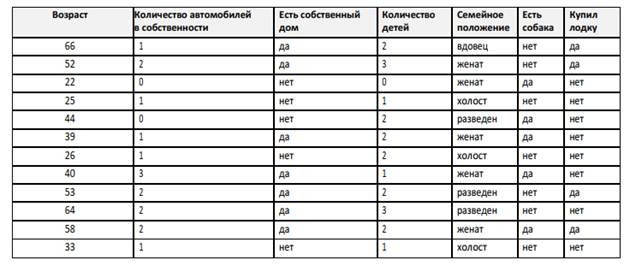

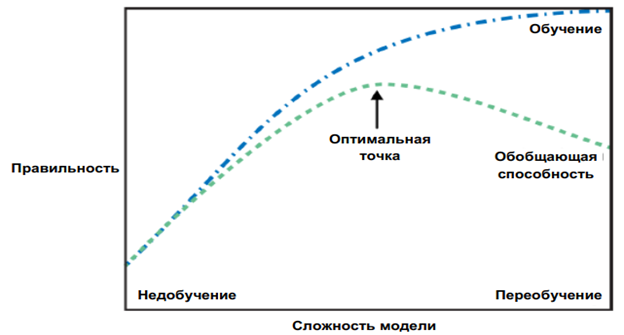

In [ ]:
# %matplotlib inline
#вспомогательная библиотека для создания рисунков и набора данных
!pip install mglearn
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
import mglearn

##Регрессия k ближайших соседей

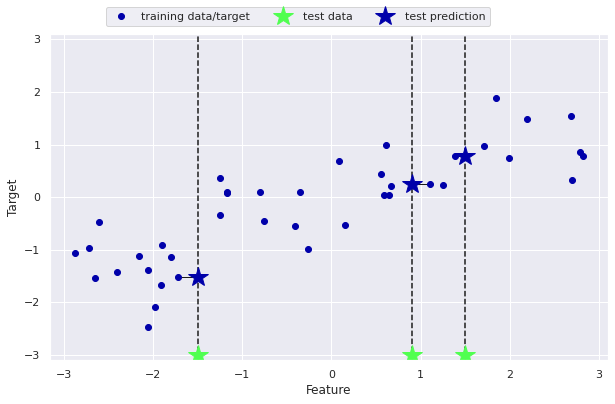

In [39]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

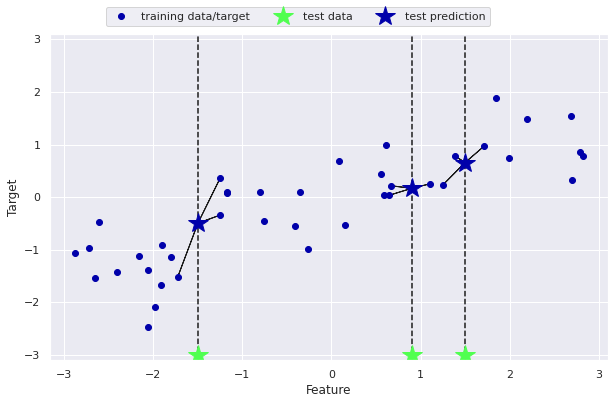

In [40]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [41]:
#В библиотеке scikit-learn есть функция train_test_split, которая перемешивает набор данных и разбивает его на две части. Эта функция
#отбирает в обучающий набор 75% строк данных с соответствующими метками. Оставшиеся 25% данных с метками объявляются тестовым
# набором. Вопрос о том, сколько данных отбирать в обучающий и тестовый наборы, является дискуссионным, однако использование
# естового набора, содержащего 25% данных, является хорошим правилом
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
X, y = mglearn.datasets.make_wave(n_samples=40)
# разбиваем набор данных wave на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
# создаем экземпляр модели и устанавливаем количество соседей равным 3
reg = KNeighborsRegressor(n_neighbors=3)
# подгоняем модель с использованием обучающих данных и обучающих ответов
reg.fit(X_train, y_train)


KNeighborsRegressor(n_neighbors=3)

In [42]:
print("Прогнозы для тестового набора:\n{}".format(reg.predict(X_test)))

Прогнозы для тестового набора:
[-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


In [43]:
print("R^2 на тестовом наборе: {:.2f}".format(reg.score(X_test, y_test)))

R^2 на тестовом наборе: 0.83


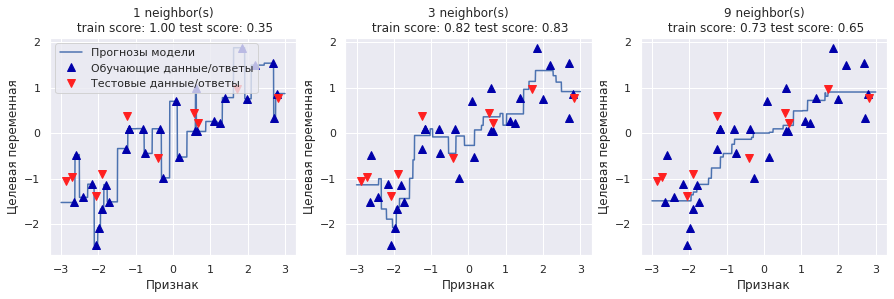

In [47]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
# создаем 1000 точек данных, равномерно распределенных между -3 и 3
line = np.linspace(-3, 3, 1000).reshape(-1, 1)
for n_neighbors, ax in zip([1, 3, 9], axes):
# получаем прогнозы, используя 1, 3, и 9 соседей
  reg = KNeighborsRegressor(n_neighbors=n_neighbors)
  reg.fit(X_train, y_train)
  ax.plot(line, reg.predict(line))
  ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
  ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)
  ax.set_title(
    "{} neighbor(s)\n train score: {:.2f} test score: {:.2f}".format(
  n_neighbors, reg.score(X_train, y_train),
  reg.score(X_test, y_test)))
  ax.set_xlabel("Признак")
  ax.set_ylabel("Целевая переменная")

axes[0].legend(["Прогнозы модели", "Обучающие данные/ответы",
"Тестовые данные/ответы"], loc="best");

##Линейный модели
###Линейные модели для регрессии

Общая формула линейной модели, где x[0] - x[p]  - признаки; w и b -параметры модели, y - прогноз

image.png

Для набора данных с одним признаком формула имеет вид

image.png

w[0]: 0.393906  b: -0.031804


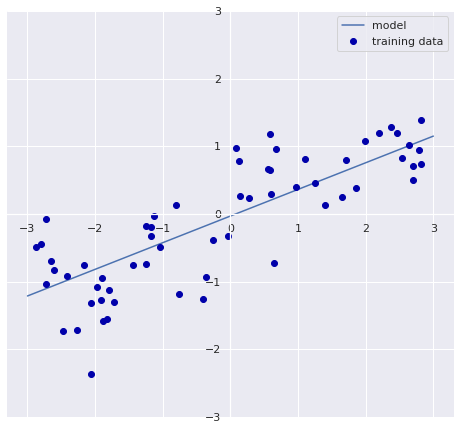

In [48]:
mglearn.plots.plot_linear_regression_wave()

##Линейная регрессия (обычный метод наименьших квадратов)

In [49]:
from sklearn.linear_model import LinearRegression
X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
lr = LinearRegression().fit(X_train, y_train)


In [50]:
print("lr.coef_: {}".format(lr.coef_))
print("lr.intercept_: {}".format(lr.intercept_))

lr.coef_: [0.39390555]
lr.intercept_: -0.031804343026759746


In [51]:
print("R-квадрат на обучающем наборе: {:.2f}".format(lr.score(X_train, y_train)))
print("R-квадрат на тестовом наборе: {:.2f}".format(lr.score(X_test, y_test)))


R-квадрат на обучающем наборе: 0.67
R-квадрат на тестовом наборе: 0.66


In [52]:
X, y = mglearn.datasets.load_extended_boston()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [53]:
print("R-квадрат на обучающем наборе: {:.2f}".format(lr.score(X_train, y_train)))
print("R-квадрат на тестовом наборе: {:.2f}".format(lr.score(X_test, y_test)))


R-квадрат на обучающем наборе: 0.95
R-квадрат на тестовом наборе: 0.61


##Гребневая регрессия

In [54]:
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train, y_train)
print("R-квадрат на обучающем наборе: {:.2f}".format(ridge.score(X_train, y_train)))
print("R-квадрат на тестовом наборе: {:.2f}".format(ridge.score(X_test, y_test)))


R-квадрат на обучающем наборе: 0.89
R-квадрат на тестовом наборе: 0.75


In [55]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("R-квадрат на обучающем наборе: {:.2f}".format(ridge10.score(X_train, y_train)))
print("R-квадрат на тестовом наборе: {:.2f}".format(ridge10.score(X_test, y_test)))


R-квадрат на обучающем наборе: 0.79
R-квадрат на тестовом наборе: 0.64


In [56]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("R-квадрат на обучающем наборе: {:.2f}".format(ridge01.score(X_train, y_train)))
print("R-квадрат на тестовом наборе: {:.2f}".format(ridge01.score(X_test, y_test)))


R-квадрат на обучающем наборе: 0.93
R-квадрат на тестовом наборе: 0.77


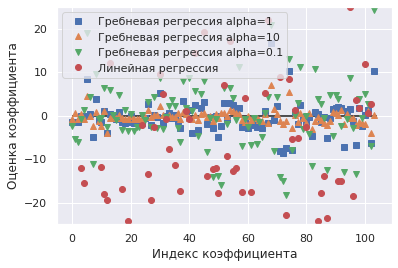

In [57]:
plt.plot(ridge.coef_, 's', label="Гребневая регрессия alpha=1")
plt.plot(ridge10.coef_, '^', label="Гребневая регрессия alpha=10")
plt.plot(ridge01.coef_, 'v', label="Гребневая регрессия alpha=0.1")
plt.plot(lr.coef_, 'o', label="Линейная регрессия")
plt.xlabel("Индекс коэффициента")
plt.ylabel("Оценка коэффициента")
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25)
plt.legend();


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

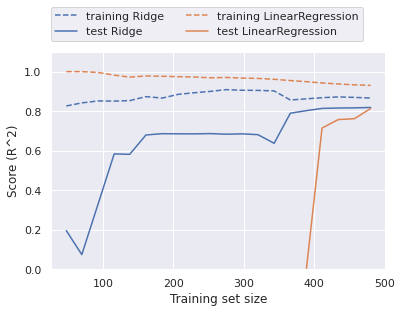

In [58]:
mglearn.plots.plot_ridge_n_samples();

##Лассо

In [59]:
from sklearn.linear_model import Lasso
lasso = Lasso().fit(X_train, y_train)
print("R-квадрат на обучающем наборе: {:.2f}".format(lasso.score(X_train, y_train)))
print("R-квадрат на контрольном наборе: {:.2f}".format(lasso.score(X_test, y_test)))
print("Количество использованных признаков: {}".format(np.sum(lasso.coef_ != 0)))


R-квадрат на обучающем наборе: 0.29
R-квадрат на контрольном наборе: 0.21
Количество использованных признаков: 4


In [60]:
# мы увеличиваем значение "max_iter",
# иначе модель выдаст предупреждение, что нужно увеличить max_iter.
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print("R-квадрат на обучающем наборе: {:.2f}".format(lasso001.score(X_train, y_train)))
print("R-квадрат на тестовом наборе: {:.2f}".format(lasso001.score(X_test, y_test)))
print("Количество использованных признаков: {}".format(np.sum(lasso001.coef_ != 0)))



R-квадрат на обучающем наборе: 0.90
R-квадрат на тестовом наборе: 0.77
Количество использованных признаков: 33


In [61]:
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print("R-квадрат на обучающем наборе: {:.2f}".format(lasso00001.score(X_train, y_train)))
print("R-квадрат на тестовом наборе: {:.2f}".format(lasso00001.score(X_test, y_test)))
print("Количество использованных признаков: {}".format(np.sum(lasso00001.coef_ != 0)))


R-квадрат на обучающем наборе: 0.95
R-квадрат на тестовом наборе: 0.64
Количество использованных признаков: 96


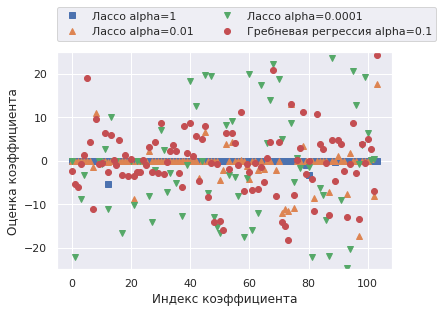

In [62]:
plt.plot(lasso.coef_, 's', label="Лассо alpha=1")
plt.plot(lasso001.coef_, '^', label="Лассо alpha=0.01")
plt.plot(lasso00001.coef_, 'v', label="Лассо alpha=0.0001")
plt.plot(ridge01.coef_, 'o', label="Гребневая регрессия alpha=0.1")
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25, 25)
plt.xlabel("Индекс коэффициента")
plt.ylabel("Оценка коэффициента");


## Практика